What is the most optimal skills to learn for data analyst

Methodology
1- Find percentage of jobs postings for each skill.
2- Plot a graph where Median salary vs percent skill demand.
3- Coloring the skills according to their respective technology.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\hamza\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [13]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [16]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

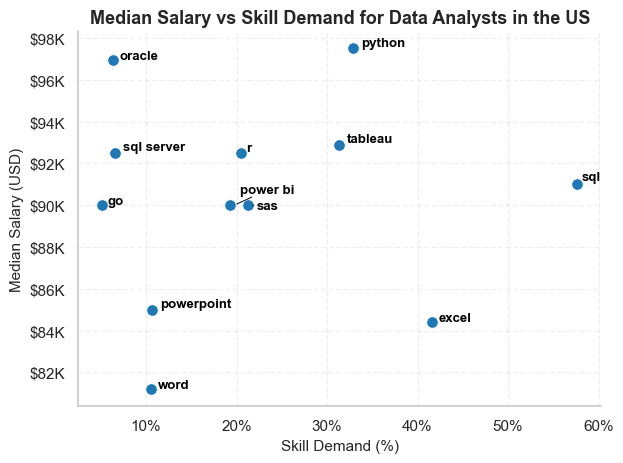

In [28]:
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt

# Clean white background
sns.set_theme(style='whitegrid')

# Scatter plot
sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    s=70,           # point size
    color='#1f77b4' # a clean blue color
)

# Titles and labels
plt.title('Median Salary vs Skill Demand for Data Analysts in the US', fontsize=13, weight='bold')
plt.xlabel('Skill Demand (%)', fontsize=11)
plt.ylabel('Median Salary (USD)', fontsize=11)

# Format the axis ticks
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# ✅ Create and collect text labels in a list for adjust_text
texts = []
for skill, row in df_DA_skills_high_demand.iterrows():
    t = plt.text(
        x=row['skill_percent'] + 0.5,   # small right offset
        y=row['median_salary'],
        s=skill,
        fontsize=9.5,
        color='black',
        weight='bold'
    )
    texts.append(t)  # Add label to list

# ✅ Adjust overlapping labels automatically
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.7))

# Clean look
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
